In [76]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [88]:
file_path = "result/TSMC.json"
tsmc = pd.read_json(file_path)

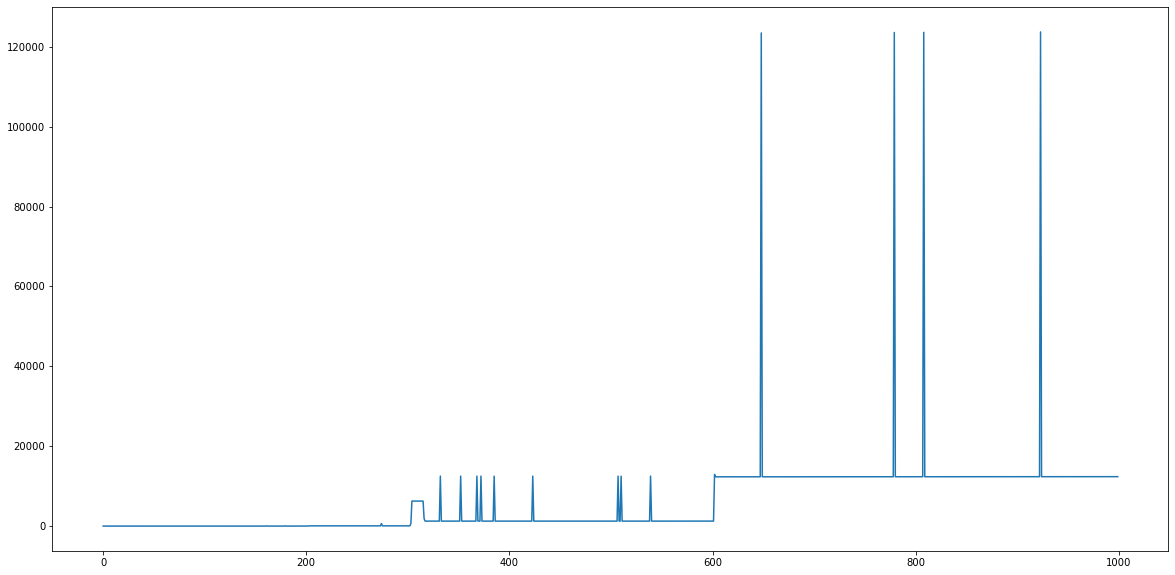

In [89]:
tsmc['average'].plot(figsize = (20, 10))

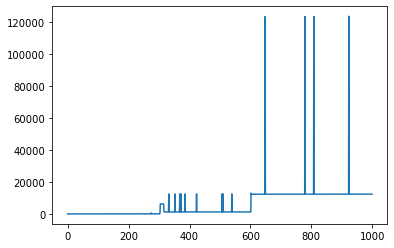

In [90]:
tsmc['average'].plot()

In [91]:
file_path = "result/agent.json"
agent = pd.read_json(file_path)

In [92]:
agent.columns

Index(['zi_1_CASH', 'zi_1_TSMC', 'zi_1_WEALTH', 'ch_1_CASH', 'ch_1_TSMC',
       'ch_1_WEALTH'],
      dtype='object')

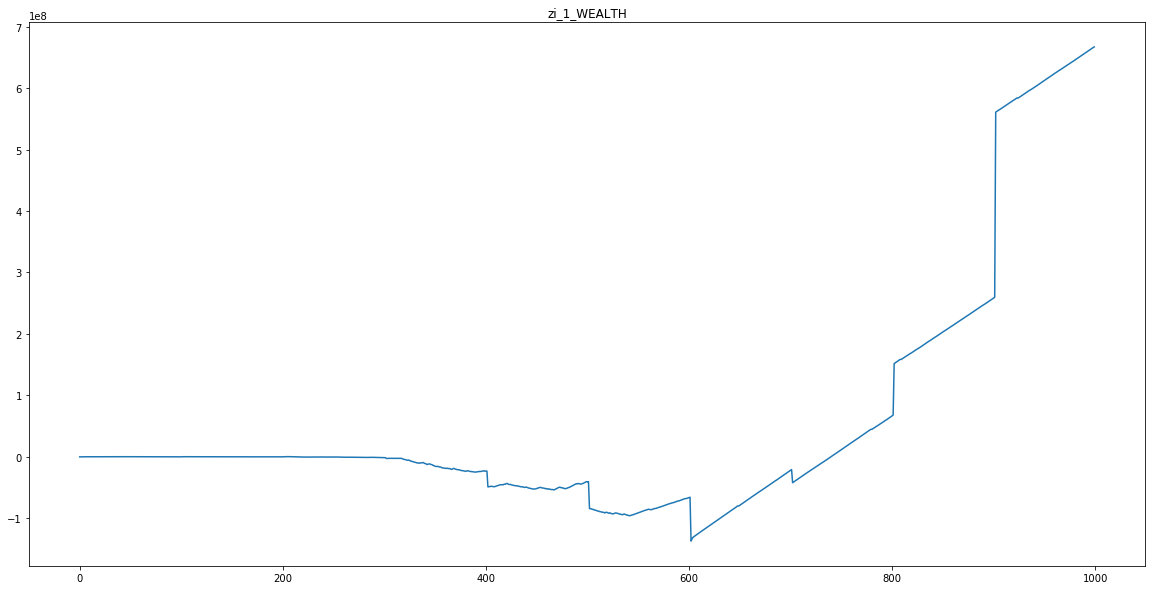

In [100]:
# for agent_type in agent.columns:
agent.iloc[:, 2].plot(title = agent.columns[2],  figsize = (20, 10))

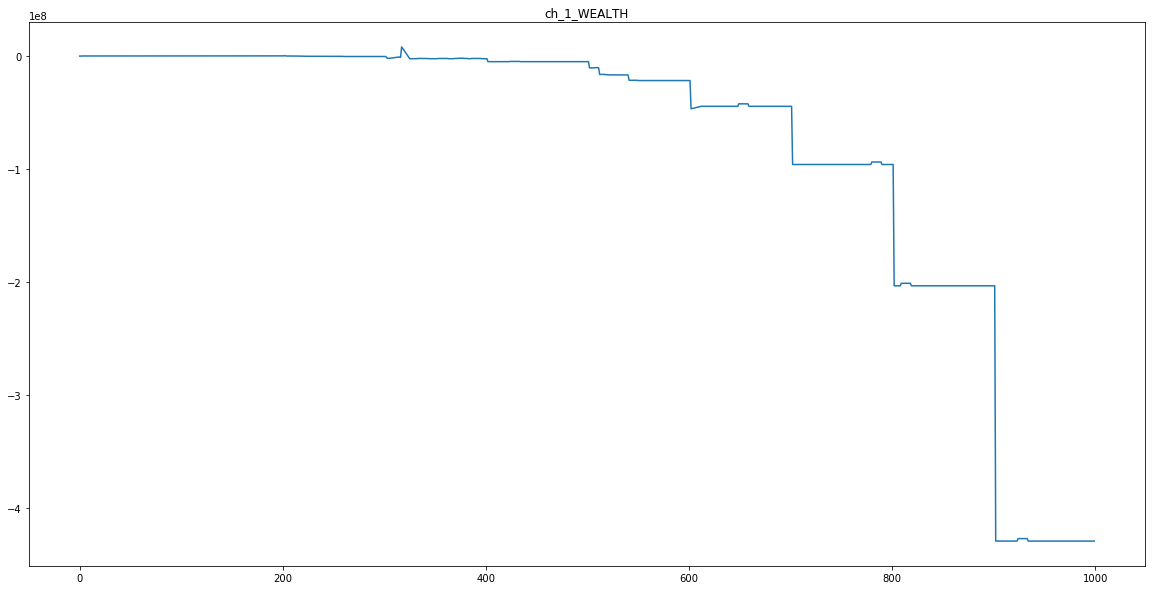

In [98]:
agent.iloc[:, 5].plot(title = agent.columns[5],  figsize = (20, 10))

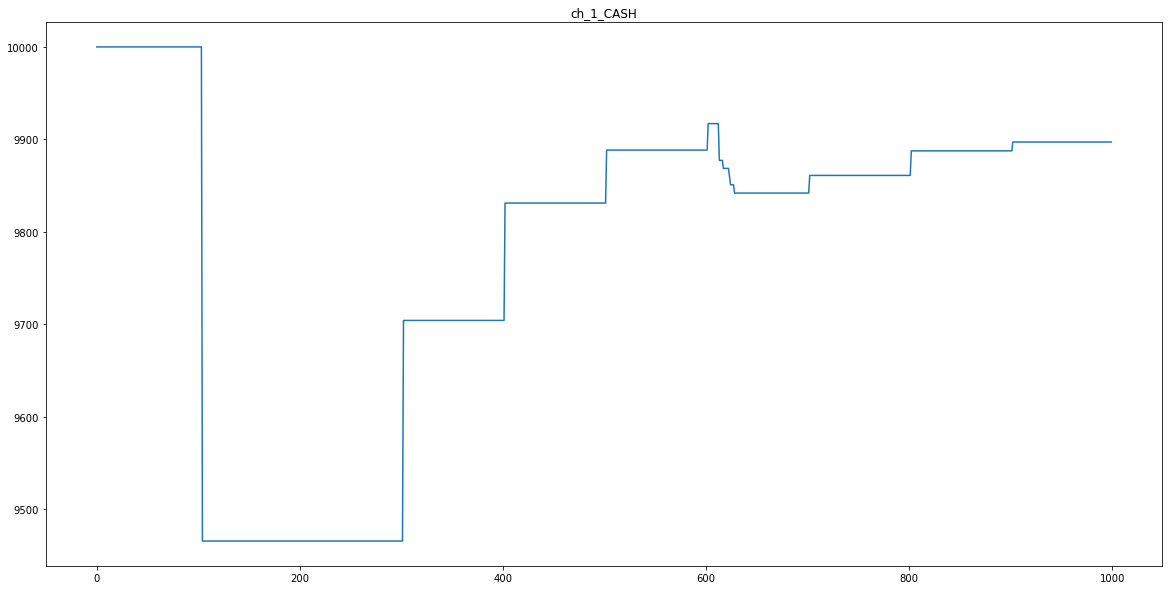

In [63]:
agent.iloc[:, 2].plot(title = agent.columns[2],  figsize = (20, 10))

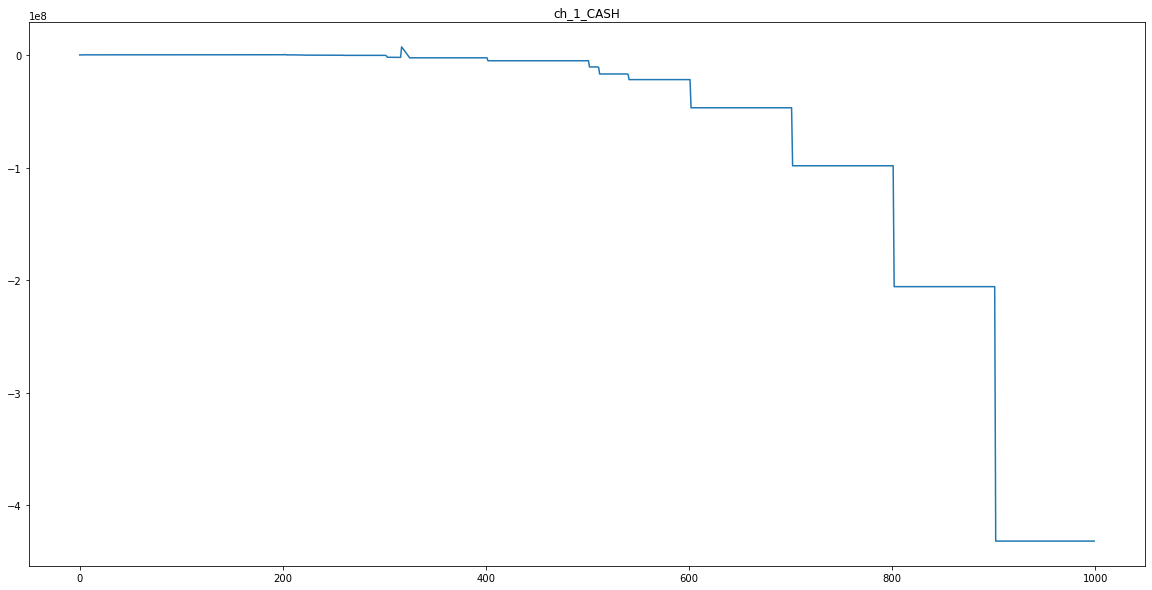

In [95]:
agent.iloc[:, 3].plot(title = agent.columns[3],  figsize = (20, 10))

In [96]:
def ut(c, a):
    return -math.exp(-c * a)

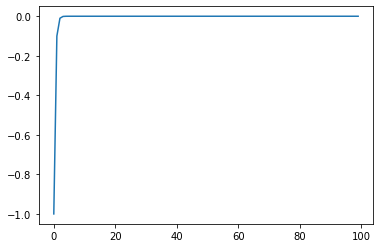

In [97]:
l = [ut(i, 2.3) for i in range(100)]
plt.plot(l)